In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.1 kB/s 
     |████████████████████████████████| 6.6 MB 860 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.5.1+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 20.3 MB 1.6 MB/s 
  Attempting uninstall:

     |████████████████████████████████| 269 kB 8.0 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=e40024707e8952a858b28bfe836ea8bdfa4b12f5d9af7ec9758c7fd40ca6c136
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-gposesdx
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-gposesdx
ERROR: File "setup.py" not found for legacy project git+https://github.com/cocodataset/cocoapi.git.


In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 8989, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 8989 (delta 24), reused 21 (delta 9), pack-reused 8929
Receiving objects: 100% (8989/8989), 14.53 MiB | 17.97 MiB/s, done.
Resolving deltas: 100% (6137/6137), done.
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
User install by explicit request
Created temporary directory: /tmp/pip-ephem-wheel-cache-yykuzzvk
Created temporary directory: /tmp/pip-req-tracker-wndz8grr
Initialized build tracking at /tmp/pip-req-tracker-wndz8grr
Created build tracker: /tmp/pip-req-tracker-wndz8grr
Entered build tracker: /tmp/pip-req-tracker-wndz8grr
Created temporary dire

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip drive/MyDrive/new_dataset

In [ ]:
import numpy as np
import cv2
import torch
import torchvision
import PIL.Image as Image
from pathlib import Path
import json

In [ ]:
def create_dataset(start_index, end_index, dataset_type):
  for i in range(start_index, end_index+1):
    img = cv2.imread(f"new_dataset/{i}.png")
    try:    # to handle if image at i doesnt exist in the dataset
      cv2.imwrite(f"images/{dataset_type}/staircase{i}.png", img)
      json_obj = open(f"new_dataset/{i}.json")
      data_dict = json.load(json_obj)
      h, w = img.shape[0], img.shape[1]
      with (Path(f"labels/{dataset_type}/staircase{i}.txt")).open(mode="w") as label_file:
        x_list = []
        y_list = []
        for point in data_dict['shapes'][0]['points']:
          x_list.append(point[0])
          y_list.append(point[1])
        x_min = min(x_list)/w
        x_max = max(x_list)/w
        y_min = min(y_list)/h
        y_max = max(y_list)/h
        bbox_width = x_max - x_min  
        bbox_height = y_max - y_min
        category_idx = 0
        label_file.write(f"{category_idx} {x_min + bbox_width / 2} {y_min + bbox_height / 2} {bbox_width} {bbox_height}\n")
    except: 
      pass
create_dataset(1329, 1670, "train")
create_dataset(1671, 1795, "val")

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9876, done.
remote: Total 9876 (delta 0), reused 0 (delta 0), pack-reused 9876
Receiving objects: 100% (9876/9876), 10.06 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (6870/6870), done.


In [ ]:
%cd yolov5
!python train.py --img 640 --batch 4 --epochs 50 \
  --data ./data/stairs.yaml --cfg ./models/yolov5s.yaml --weights ../best2.pt \
  --name yolov5s_stairs --cache
%cd ..

In [ ]:
%cd yolov5
!python detect.py --weights runs/train/yolov5s_stairs/weights/best.pt \
  --img 640 --conf 0.4 --source ../images/stair.jpeg
%cd ..

/content/yolov5
detect: weights=['runs/train/yolov5s_stairs/weights/best.pt'], source=../images/stair.jpeg, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-25-g15e8c4c torch 1.10.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/1 /content/images/stair.jpeg: 384x640 1 stairs, Done. (0.024

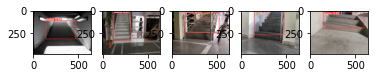

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.subplot(1,5,i+1)
  img = plt.imread(f"./yolov5/runs/detect/exp6/staircase{1671+i}.png")
  plt.imshow(img)
plt.savefig("examples.png")